IMPLEMETING ISOLATION FOREST MODEL 

In [9]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("clenaed_data.xlsx", index_col="time")
df

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,0.749488,0.702192,0.537540,0.288208,0.615879,0.571836
2017-01-01 00:05:00,0.759509,0.707141,0.548025,0.292363,0.623519,0.563024
2017-01-01 00:10:00,0.756433,0.711013,0.554203,0.308848,0.626112,0.573868
2017-01-01 00:15:00,0.756097,0.710353,0.558449,0.300031,0.625958,0.578868
2017-01-01 00:20:00,0.770246,0.717474,0.560119,0.301201,0.633458,0.577567
...,...,...,...,...,...,...
2020-08-07 11:55:00,0.776949,0.708199,0.468054,0.263181,0.651788,0.505057
2020-08-07 12:00:00,0.760087,0.692321,0.460065,0.261588,0.634942,0.500970
2020-08-07 12:05:00,0.766393,0.692756,0.455899,0.258034,0.640261,0.495856


In [ ]:
features = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Outlet_Gas_draft',
            'Cyclone_cone_draft', 'Cyclone_Inlet_Draft', 'Cyclone_Material_Temp']


isf = IsolationForest(
    n_estimators=1000,
    max_samples="auto",
    contamination=0.001,  
    max_features=1,  # for train separately each feature
    bootstrap=False,
    n_jobs=-1,  
    random_state=100,
    verbose=0,
    warm_start=True
)

for feature in features:
    df[f'{feature}_anomaly'] = isf.fit_predict(df[[feature]]) 


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:525: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:525: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:525: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:525: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:525: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


IT IS NOTICED THAT THE ALGORITHM DID NOT WORK WELL FOR THE DATA BY WRONGLY CLASSIFYING ANOMALY POINTS

C:\Users\hp\AppData\Local\Temp\ipykernel_26840\458577009.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


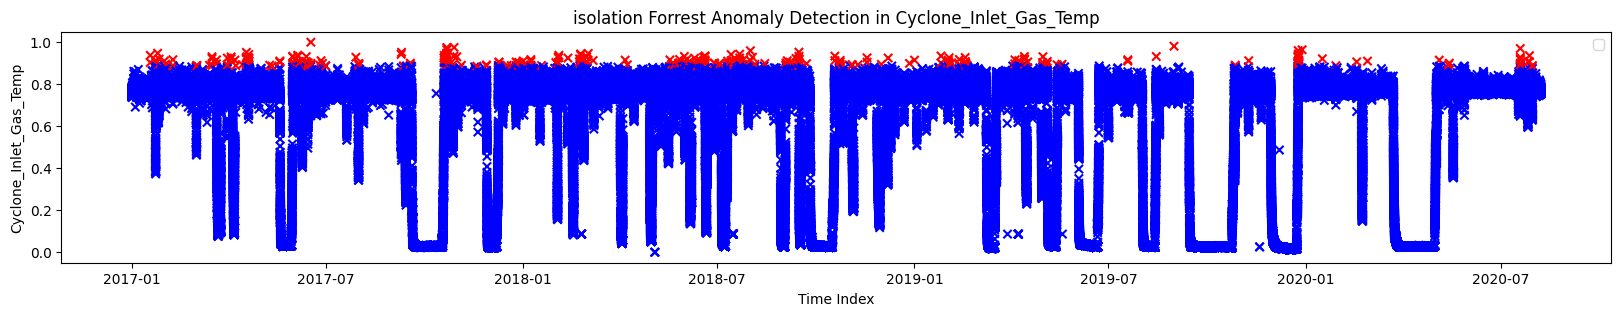

C:\Users\hp\AppData\Local\Temp\ipykernel_26840\458577009.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


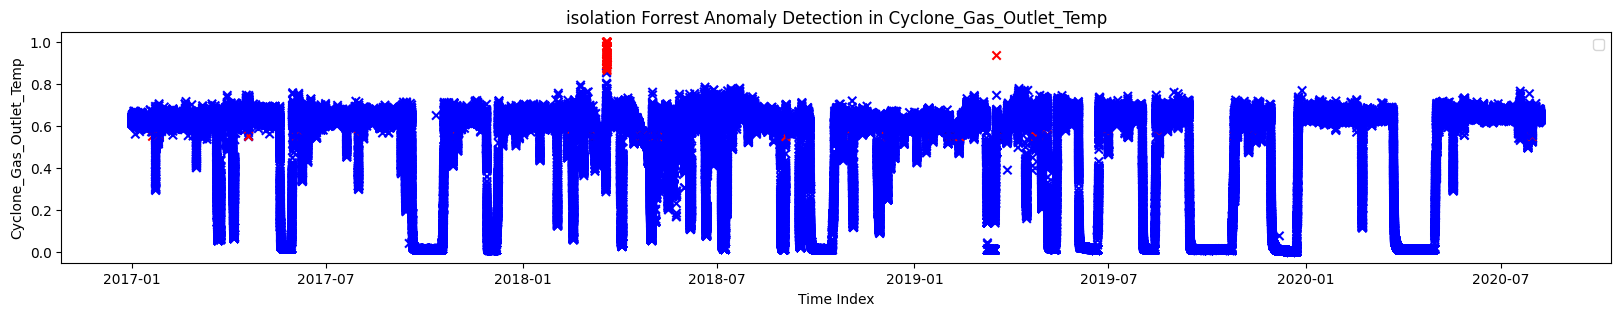

C:\Users\hp\AppData\Local\Temp\ipykernel_26840\458577009.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


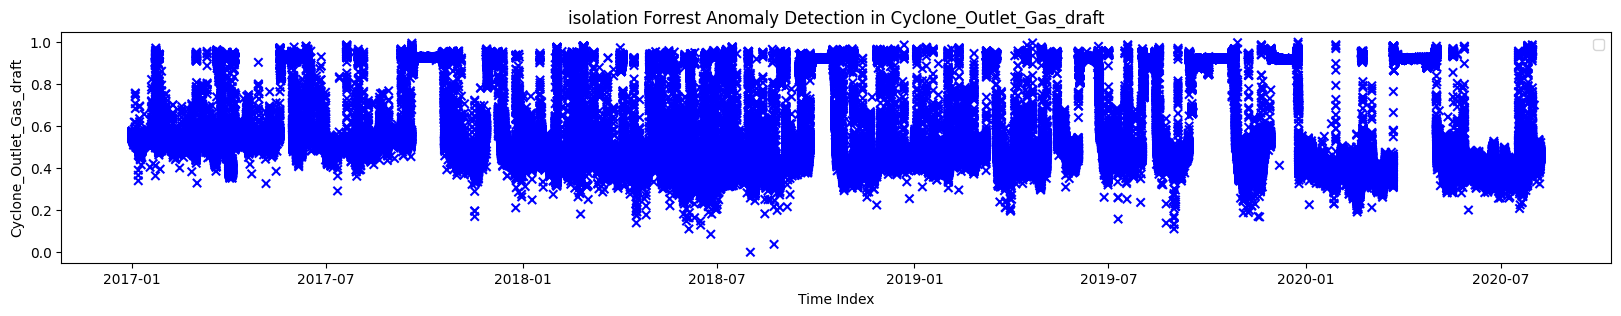

C:\Users\hp\AppData\Local\Temp\ipykernel_26840\458577009.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


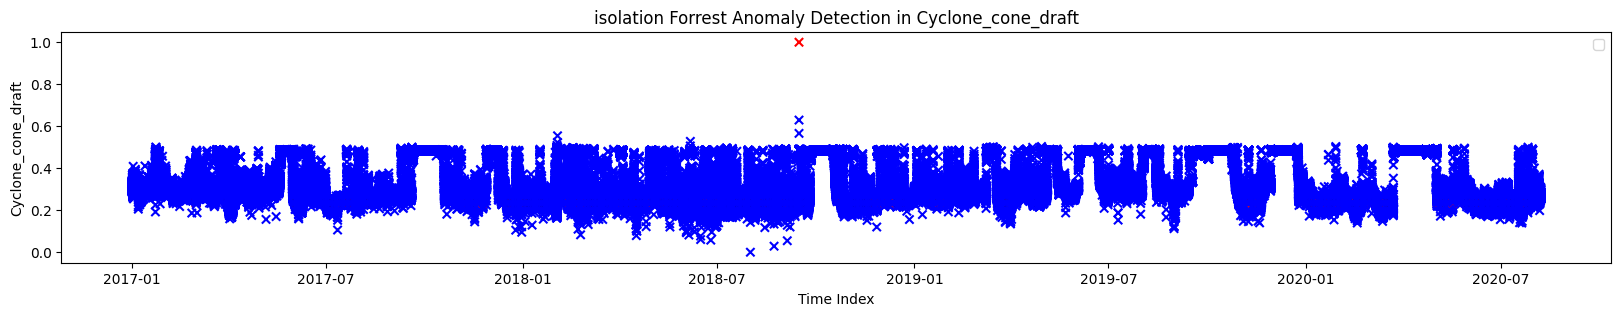

C:\Users\hp\AppData\Local\Temp\ipykernel_26840\458577009.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


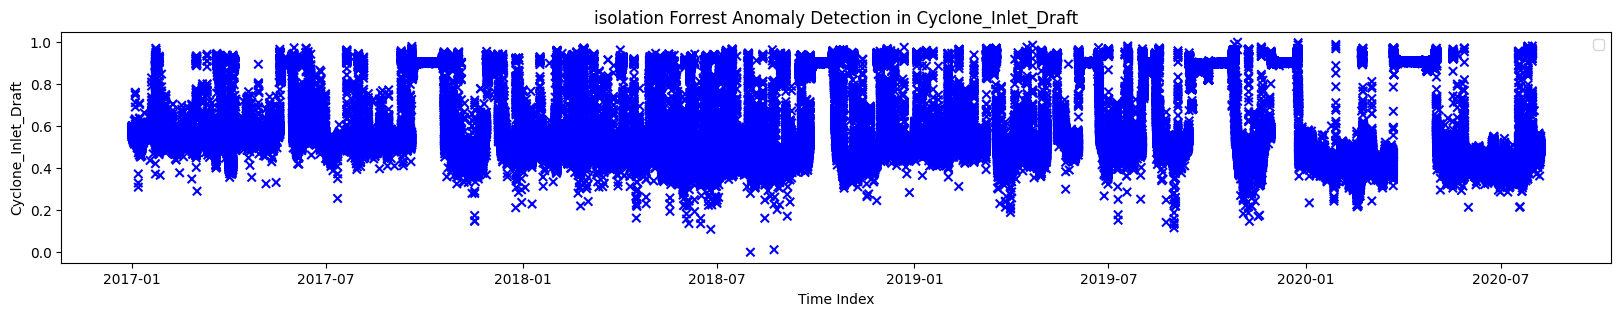

C:\Users\hp\AppData\Local\Temp\ipykernel_26840\458577009.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


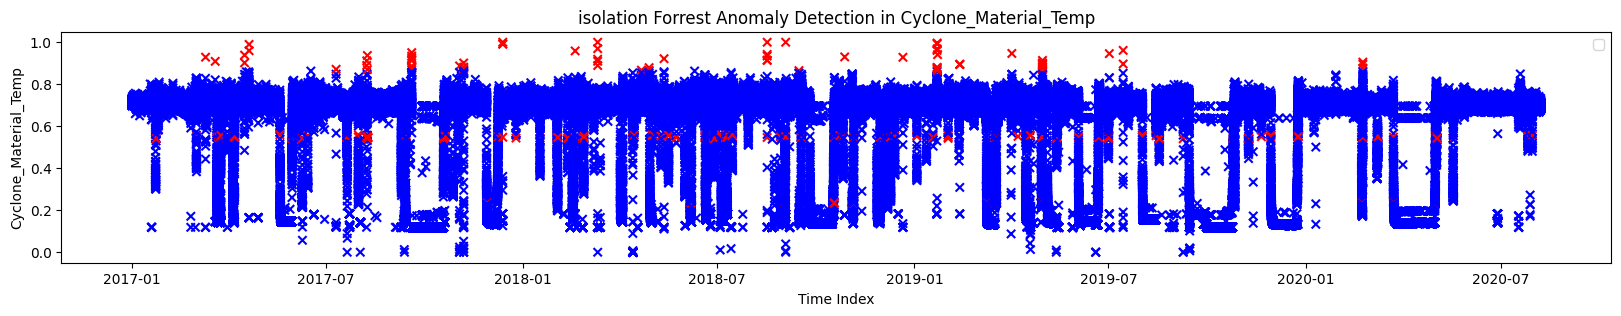

In [27]:
colors = {1: 'blue', -1: 'red'}

for i in features:    
    plt.figure(figsize=(20, 3))
    plt.scatter(df.index, df[i], c=df[f'{i}_anomaly'].map(colors), marker='x')
    plt.xlabel('Time Index')
    plt.ylabel(f'{i}')
    plt.title(f'isolation Forrest Anomaly Detection in {i}')
    plt.legend()
    plt.show()